# VAEX: review

Vaex is a high performance Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. 

### References:

- [x] [Github](https://github.com/vaexio/vaex)
- [ ] [Vaex API Documentation](https://vaex.io/docs/api.html)
- [x] [Documentation: NY taxi dataset](https://vaex.io/docs/datasets.html)
- [x] [Vaex introduction in 11 minutes](https://vaex.readthedocs.io/en/latest/tutorial.html)
- [ ] [8 incredibly powerful Vaex features you might have not known about](https://vaex.io/blog/8-incredibly-powerful-Vaex-features-you-might-have-not-known-about)

In [1]:
%matplotlib inline
import os
import vaex
import warnings; warnings.filterwarnings("ignore")
import time
vaex.__version__

{'vaex': '4.17.0',
 'vaex-core': '4.17.1',
 'vaex-viz': '0.5.4',
 'vaex-hdf5': '0.14.1',
 'vaex-server': '0.9.0',
 'vaex-astro': '0.9.3',
 'vaex-jupyter': '0.8.2',
 'vaex-ml': '0.18.3'}

# load big data file

In [2]:
# load remote data
start = time.time()
df = vaex.open('s3://vaex/airline/us_airline_data_1988_2018.hdf5?anon=true')
end = time.time()
print('time: {} seconds'.format(end - start))
# dimenssions
print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')
# object type confirmation
print(type(df))

time: 6.472127914428711 seconds
number of rows: 183,821,926
number of columns: 29
<class 'vaex.dataframe.DataFrameLocal'>


In [3]:
# get basic information
df.info()

column,type,unit,description,expression
Year,int16,,,
Month,int8,,,
DayOfMonth,int16,,,
DayOfWeek,int8,,,
UniqueCarrier,str,,,
TailNum,str,,,
FlightNum,int16,,,
Origin,str,,,
Dest,str,,,
CRSDepTime,int16,,,


# load iris file

In [4]:
folder_data = '../../../data'
os.listdir(folder_data)

['iris_dataset.parquet', 'iris_dataset.csv']

## csv

In [5]:
start = time.time()
df = vaex.open(os.path.join(folder_data, 'iris_dataset.csv'))
end = time.time()
print('time: {} seconds'.format(end - start))
# dimenssions
print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')
# object type confirmation
print(type(df))



time: 0.03244209289550781 seconds
number of rows: 150
number of columns: 5
<class 'vaex.dataframe.DataFrameLocal'>


## parquet

In [6]:
start = time.time()
df = vaex.open(os.path.join(folder_data, 'iris_dataset.parquet'))
end = time.time()
print('time: {} seconds'.format(end - start))
# dimenssions
print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')
# object type confirmation
print(type(df))

time: 0.048711299896240234 seconds
number of rows: 150
number of columns: 5
<class 'vaex.dataframe.DataFrameLocal'>


In [7]:
df.info()

In [8]:
df.head()

#,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [9]:
df.tail()

#,sepal.length,sepal.width,petal.length,petal.width,variety
0,6.7,3.1,5.6,2.4,Virginica
1,6.9,3.1,5.1,2.3,Virginica
2,5.8,2.7,5.1,1.9,Virginica
3,6.8,3.2,5.9,2.3,Virginica
4,6.7,3.3,5.7,2.5,Virginica
5,6.7,3,5.2,2.3,Virginica
6,6.3,2.5,5,1.9,Virginica
7,6.5,3,5.2,2,Virginica
8,6.2,3.4,5.4,2.3,Virginica
9,5.9,3,5.1,1.8,Virginica


# dataframe conversion

In [10]:
df_pandas = df.head(5).to_pandas_df()
type(df_pandas)

pandas.core.frame.DataFrame

# dataframe description

In [11]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
data_type,float64,float64,float64,float64,string
count,150,150,150,150,150
NA,0,0,0,0,0
mean,5.843333333333335,3.057333333333334,3.7580000000000027,1.199333333333334,--
std,0.825301,0.434411,1.759404,0.759693,--
min,4.3,2.0,1.0,0.1,--
max,7.9,4.4,6.9,2.5,--


In [12]:
df.to_pandas_df().columns.tolist()

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [13]:
df["sepal.length"].values

[
  5.1,
  4.9,
  4.7,
  4.6,
  5,
  5.4,
  4.6,
  5,
  4.4,
  4.9,
  ...
  6.7,
  6.9,
  5.8,
  6.8,
  6.7,
  6.7,
  6.3,
  6.5,
  6.2,
  5.9
]

In [22]:
df.variety.unique()

['Virginica', 'Versicolor', 'Setosa']

# data sampling

In [14]:
df[df.variety == "Setosa"]

#,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
45,4.8,3.0,1.4,0.3,Setosa
46,5.1,3.8,1.6,0.2,Setosa
47,4.6,3.2,1.4,0.2,Setosa
48,5.3,3.7,1.5,0.2,Setosa


In [21]:
df[df.variety.isin(["Setosa", "Virginica"])]

#,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica
96,6.3,2.5,5.0,1.9,Virginica
97,6.5,3.0,5.2,2.0,Virginica
98,6.2,3.4,5.4,2.3,Virginica


In [32]:
df[df["sepal.width"] > 3.5]

#,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.0,3.6,1.4,0.2,Setosa
1,5.4,3.9,1.7,0.4,Setosa
2,5.4,3.7,1.5,0.2,Setosa
3,5.8,4.0,1.2,0.2,Setosa
4,5.7,4.4,1.5,0.4,Setosa
...,...,...,...,...,...
14,5.1,3.8,1.6,0.2,Setosa
15,5.3,3.7,1.5,0.2,Setosa
16,7.2,3.6,6.1,2.5,Virginica
17,7.7,3.8,6.7,2.2,Virginica


### Selections and filtering¶

Vaex can be efficient when exploring subsets of the data, for instance to remove outliers or to inspect only a part of the data. Instead of making copies, Vaex internally keeps track which rows are selected.

In [40]:
df.select(df["sepal.width"] > 3.5)
df.evaluate(df["sepal.width"], selection=True)

[
  3.6,
  3.9,
  3.7,
  4,
  4.4,
  3.9,
  3.8,
  3.8,
  3.7,
  3.6,
  4.1,
  4.2,
  3.6,
  3.8,
  3.8,
  3.7,
  3.6,
  3.8,
  3.8
]

In [54]:
df.evaluate(df['sepal.width'], selection=df["sepal.width"] > 3.5)

[
  3.6,
  3.9,
  3.7,
  4,
  4.4,
  3.9,
  3.8,
  3.8,
  3.7,
  3.6,
  4.1,
  4.2,
  3.6,
  3.8,
  3.8,
  3.7,
  3.6,
  3.8,
  3.8
]

# statistics

In [45]:
df.mean(df["sepal.width"]), df.mean(df["sepal.width"], selection=True)

(array(3.05733333), array(3.83157895), mean(df['sepal.width']))

# plots

## histogram

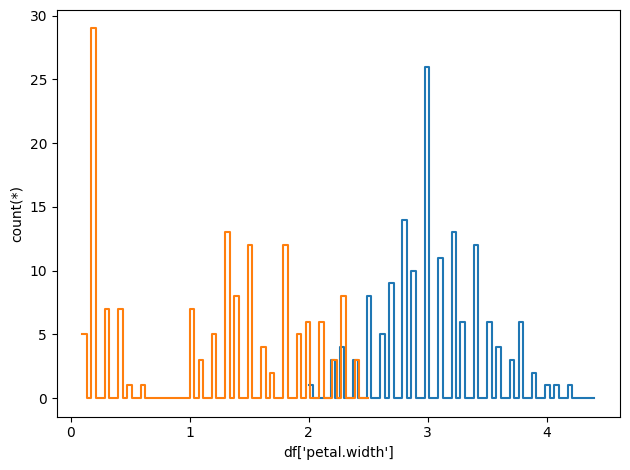

In [51]:
df.viz.histogram(df['sepal.width'])
df.viz.histogram(df['petal.width'])

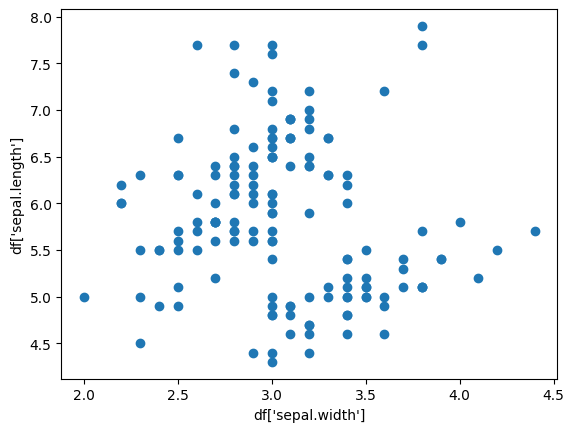

In [28]:
df.viz.scatter(df['sepal.width'], df['sepal.length'])

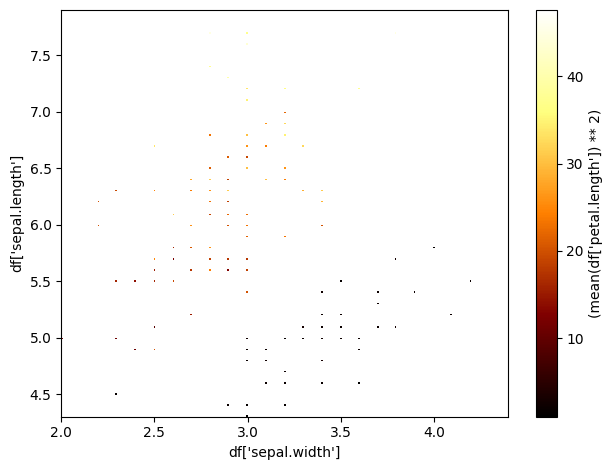

In [49]:
df.viz.heatmap(df['sepal.width'], df['sepal.length'], what=vaex.stat.mean(df['petal.length'])**2)

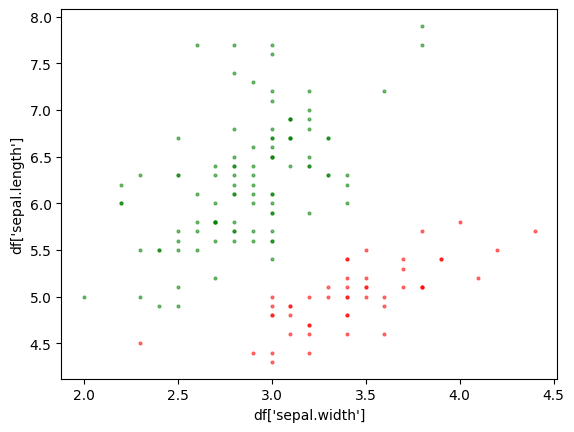

In [50]:
df.viz.scatter(df['sepal.width'], df['sepal.length'], selection=df['petal.width'] < 0.6, c="red", alpha=0.5, s=4)
df.viz.scatter(df['sepal.width'], df['sepal.length'], selection=df['petal.width'] > 0.6, c="green", alpha=0.5, s=4);

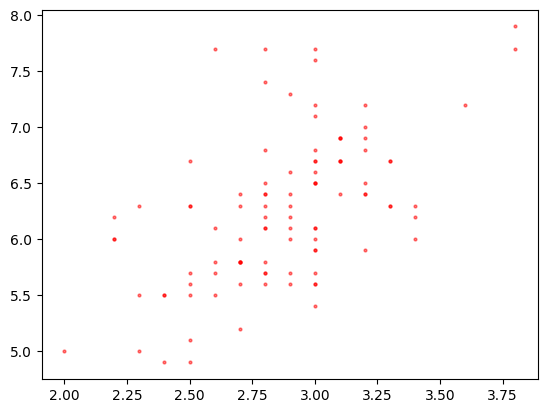

In [53]:
import matplotlib.pyplot as plt
x = df.evaluate(df['sepal.width'], selection=df['petal.width'] > 0.6)
y = df.evaluate(df['sepal.length'], selection=df['petal.width'] > 0.6)
plt.scatter(x, y, c="red", alpha=0.5, s=4);

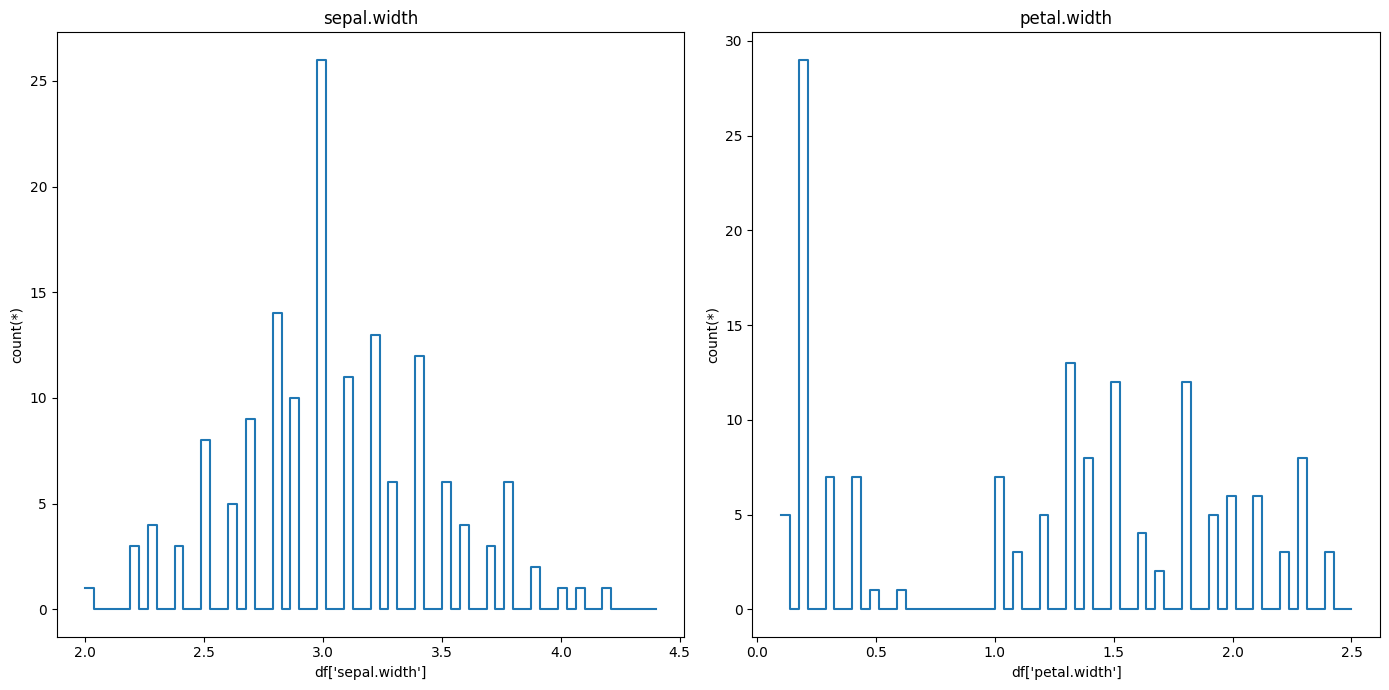

In [57]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
plt.sca(ax1)
df.viz.histogram(df['sepal.width'])
ax1.set_title('sepal.width')
plt.sca(ax2)
df.viz.histogram(df['petal.width'])
ax2.set_title('petal.width')
plt.show()